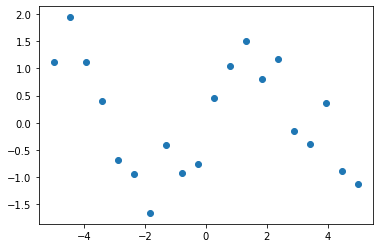

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

X = np.linspace(-5, 5, 20)
#y = -X**2 + norm.rvs(0, 2, size=20)
y = np.sin(X) + norm.rvs(0, 0.4, size=20)

plt.scatter(X, y)

Нейросеть в 2 слоя. В первом 3 нейрона, в выходном слое один

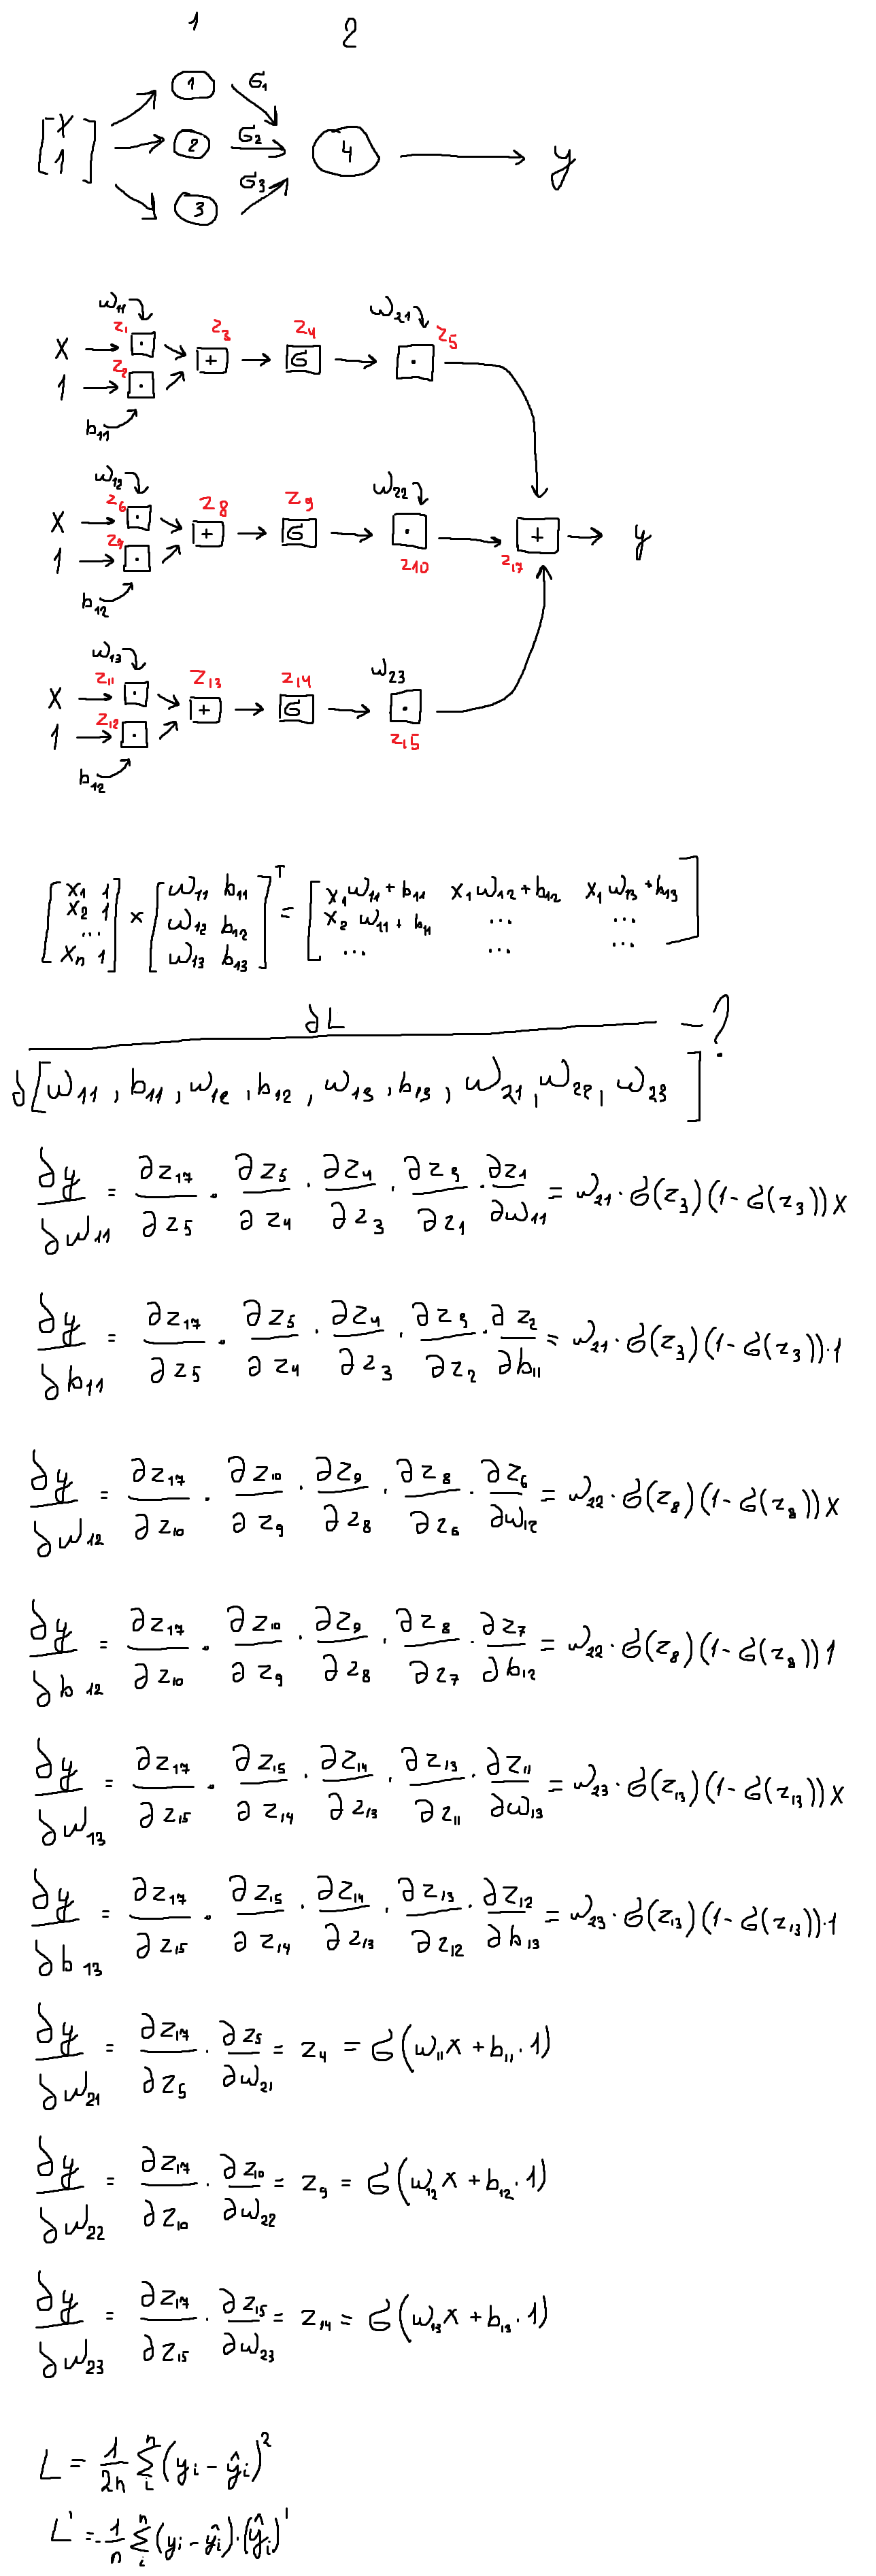

In [22]:
# Увеличил число нейронов с 3 до 6
class Net():

  def __init__(self):
    self.eta = 0.005 #  Градиентный шаг
    self.W_1 = norm.rvs(0,2, 12).reshape(6,2) #  Инициализация весов нейронов первого слоя
    self.W_1[:,1] = np.array([-5, -3, -1, 1, 3, 5]) # Делаем непохожими веса друг на друга
    self.W_2 = norm.rvs(0,10, 6) #  Инициализация весов нейрона второго слоя
    # Оказывается очень важно, чтобы веса отличались друг от друга


  def sigma(self, x):
    return 1/(1+np.exp(-x))

  def d_sigma(self, x):
    return self.sigma(x)*(1-self.sigma(x))

  def lin_sum(self, X):
    return X @ self.W_1.T

  def predict(self, X):
    pred = self.sigma(X @ self.W_1.T) @ self.W_2
    return pred

  def metric(self, X, y):
    delta = y - self.predict(X)
    print('Loss = ' + str((delta**2).sum()))


  def fit(self, X , y):
    X = np.array([X, np.ones(X.shape[0])]).T #  Добавляем колонку единичек для свободного члена
    for i in range(60000):
      delta = y - self.predict(X)
      grad_1 = self.eta * 1/X.shape[0] * delta * (self.W_2 * self.d_sigma(self.lin_sum(X))).T @ X
      grad_2 = self.eta * 1/X.shape[0] * delta @ X @ self.W_1.T
      self.W_1 += grad_1
      self.W_2 += grad_2
      if i % 1000 == 0:
        self.metric(X, y)

In [15]:
net = Net()

In [19]:
net.fit(X, y)

Loss = 11.2214521174025
Loss = 10.389396741179633
Loss = 10.112077109960676
Loss = 9.904495234262836
Loss = 9.751093210431229
Loss = 9.63847061566721
Loss = 9.555860387459008
Loss = 9.495016031967474
Loss = 9.449818535024527
Loss = 9.41582103026829
Loss = 9.38983556165034
Loss = 9.369596557687652
Loss = 9.353502396465254
Loss = 9.340423785283859
Loss = 9.329564812547089
Loss = 9.320363665395872
Loss = 9.312422393237902
Loss = 9.305457558460205
Loss = 9.299265725421499
Loss = 9.293699402357511
Loss = 9.288650303586246
Loss = 9.284037716824313
Loss = 9.279800420260196
Loss = 9.275891062859086
Loss = 9.272272251679771
Loss = 9.26891382129437
Loss = 9.265790921674226
Loss = 9.262882672981078
Loss = 9.26017121339857
Loss = 9.25764101990156
Loss = 9.255278419011061
Loss = 9.253071230227418
Loss = 9.251008502524444
Loss = 9.249080316485127
Loss = 9.247277633069032
Loss = 9.245592175800644
Loss = 9.244016337168004
Loss = 9.242543102783808
Loss = 9.241165988770103
Loss = 9.239878989151096
Loss 

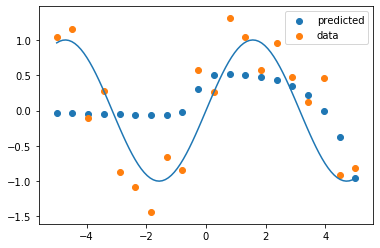

In [20]:
hui = np.array([X, np.ones(X.shape[0])]).T
plt.scatter(X, net.predict(hui), label='predicted')
plt.scatter(X, y, label='data')
plt.plot(np.linspace(-5, 5, 100), np.sin(np.linspace(-5, 5, 100)))
plt.legend()

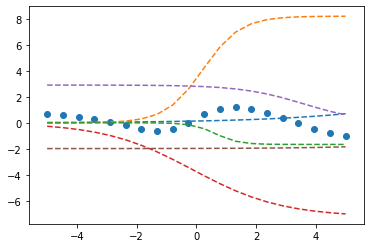

In [12]:
for i in range(6):
  plt.plot(X, net.sigma(hui @ net.W_1.T).T[i]*net.W_2[i], '--')

plt.scatter(X, net.predict(hui))